# Building the Perceptron Forward Pass in PyTorch

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/fabiobento/dnn-course-2026-1/blob/main/aulas/dl-pytorch/intro-dl/docs/perceptron-pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/fabiobento/dnn-course-2026-1/blob/main/aulas/dl-pytorch/intro-dl/docs/perceptron-pytorch.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## Step 1: Setting Up the Environment

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np # Import numpy for linspace and array operations

# For reproducibility of random initializations
torch.manual_seed(42)

## Step 2: Constructing the Perceptron Class


In [ ]:
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

## Step 3: Dataset Preparation and Visualization


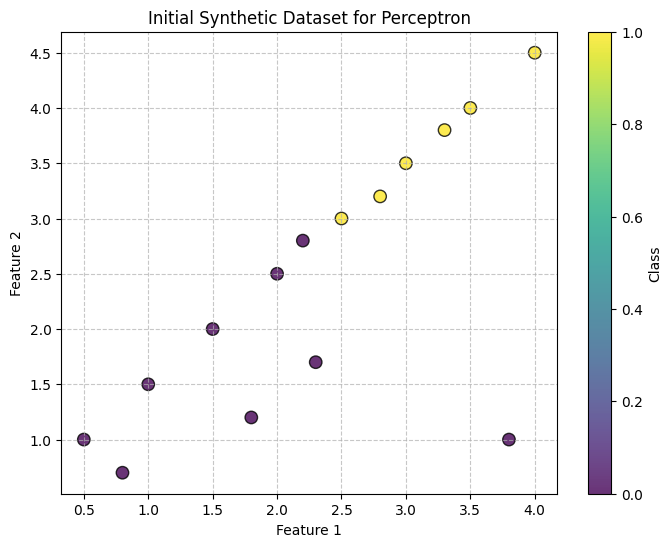

In [ ]:
X = torch.tensor([
    [0.5, 1.0], [1.5, 2.0], [2.5, 3.0],
    [1.0, 1.5], [0.8, 0.7], [2.0, 2.5],
    [3.0, 3.5], [3.5, 4.0], [4.0, 4.5],
    [2.8, 3.2], [3.3, 3.8], [2.2, 2.8],
    [1.8, 1.2], [2.3, 1.7], [3.8, 1.0]
], dtype=torch.float32)

y = torch.tensor([
    0, 0, 1,
    0, 0, 0,
    1, 1, 1,
    1, 1, 0,
    0, 0, 0
], dtype=torch.float32).view(-1, 1) # Reshape y to (num_samples, 1)

# Visualize the initial dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis', edgecolor='k', s=80, alpha=0.8)
plt.title('Initial Synthetic Dataset for Perceptron')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(label='Class')
plt.show()

## Step 4: Executing the Forward Pass


In [ ]:
input_size = X.shape[1]
perceptron = Perceptron(input_size=input_size)
criterion = nn.BCEWithLogitsLoss() # Combines Sigmoid and BCE for stability
learning_rate = 0.1
optimizer = optim.SGD(perceptron.parameters(), lr=learning_rate)

num_epochs = 1000
print("Starting Training Loop...")
for epoch in range(num_epochs):
    outputs = perceptron.linear(X) # Get raw logits
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        current_weights = perceptron.linear.weight.data.numpy()
        current_bias = perceptron.linear.bias.data.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, '
              f'Weights: {current_weights.flatten()}, Bias: {current_bias:.4f}')

print("\nTraining Complete!")

with torch.no_grad():
    final_outputs_logits = perceptron.linear(X)
    final_probabilities = torch.sigmoid(final_outputs_logits)
    predicted_classes = (final_probabilities >= 0.5).float()
    accuracy = (predicted_classes == y).float().mean().item()
    print(f"\nFinal Accuracy on Training Data: {accuracy:.4f}")

Starting Training Loop...
Epoch [100/1000], Loss: 0.4424, Weights: [-0.12809496  0.7461354 ], Bias: -1.5202
Epoch [200/1000], Loss: 0.3574, Weights: [-0.1663236  1.0809157], Bias: -2.3716
Epoch [300/1000], Loss: 0.3082, Weights: [-0.15352207  1.3010441 ], Bias: -3.0339
Epoch [400/1000], Loss: 0.2759, Weights: [-0.12286216  1.4628067 ], Bias: -3.5769
Epoch [500/1000], Loss: 0.2527, Weights: [-0.08513853  1.5897534 ], Bias: -4.0387
Epoch [600/1000], Loss: 0.2351, Weights: [-0.04460925  1.6937791 ], Bias: -4.4420
Epoch [700/1000], Loss: 0.2212, Weights: [-0.00318004  1.7816755 ], Bias: -4.8011
Epoch [800/1000], Loss: 0.2099, Weights: [0.03822538 1.8576639 ], Bias: -5.1259
Epoch [900/1000], Loss: 0.2005, Weights: [0.07913677 1.9245371 ], Bias: -5.4230
Epoch [1000/1000], Loss: 0.1924, Weights: [0.11931159 1.9842352 ], Bias: -5.6973

Training Complete!

Final Accuracy on Training Data: 0.9333


## Step 5: Visualizing Decision Boundaries


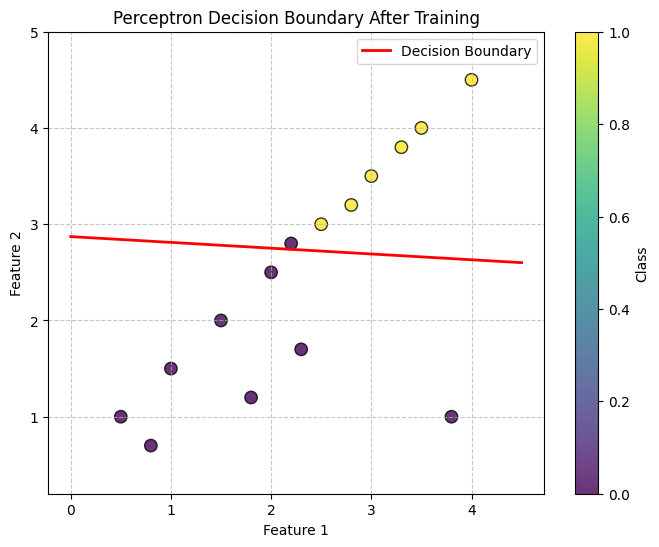


Testing with new data points:
New Input: [1.  0.5] -> Predicted Class: 0 (Probability: 0.0101)
New Input: [3.5 4.2] -> Predicted Class: 1 (Probability: 0.9550)
New Input: [2. 2.] -> Predicted Class: 0 (Probability: 0.1839)


In [ ]:
# --- 6. Visualize the Decision Boundary and Data Points ---
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis', edgecolor='k', s=80, alpha=0.8)
plt.title('Perceptron Decision Boundary After Training')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot the decision boundary (w1*x1 + w2*x2 + b = 0)
# Rearranging: x2 = (-w1*x1 - b) / w2
w1, w2 = perceptron.linear.weight.data.numpy().flatten()
b = perceptron.linear.bias.data.item()

# Create a range of x1 values for the plot
x1_min, x1_max = X[:, 0].min().item(), X[:, 0].max().item()
x1_plot = np.linspace(x1_min - 0.5, x1_max + 0.5, 100) # Extend range slightly

# Calculate corresponding x2 values for the decision boundary line
if abs(w2) > 1e-6: # Avoid division by zero if w2 is near zero
    x2_plot = (-w1 * x1_plot - b) / w2
    plt.plot(x1_plot, x2_plot, color='red', linestyle='-', linewidth=2, label='Decision Boundary')
    # Adjust y-limits to ensure the boundary line is fully visible and the plot looks good
    plt.ylim(X[:, 1].min().item() - 0.5, X[:, 1].max().item() + 0.5)
else:
    # If w2 is near zero, the boundary is essentially vertical (x1 = -b/w1)
    if abs(w1) > 1e-6:
        plt.axvline(x=-b/w1, color='red', linestyle='-', linewidth=2, label='Decision Boundary')
    else:
        # If both w1 and w2 are near zero, the boundary is undefined or the model hasn't learned
        pass

plt.legend()
plt.colorbar(label='Class')
plt.show()

# --- 7. Test with a few new data points ---
print("\nTesting with new data points:")
new_data = torch.tensor([
    [1.0, 0.5],
    [3.5, 4.2],
    [2.0, 2.0]
], dtype=torch.float32)

with torch.no_grad():
    new_outputs_logits = perceptron.linear(new_data)
    new_probabilities = torch.sigmoid(new_outputs_logits)
    new_predictions = (new_probabilities >= 0.5).float()

    for i in range(new_data.size(0)):
        print(f"New Input: {new_data[i].numpy()} -> Predicted Class: {int(new_predictions[i].item())} "
              f"(Probability: {new_probabilities[i].item():.4f})")